## 理解 PyTorch 中的 affine_grid 和 grid_sample


grid = torch.nn.functional.affine_grid(theta, size)，

outputs = torch.nn.functional.grid_sample(inputs, grid, mode='bilinear')

参考代码：https://www.jianshu.com/p/723af68beb2e

In [1]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn import functional as F
import math

%matplotlib inline

### 原图展示

torch.Size([4, 300, 200])


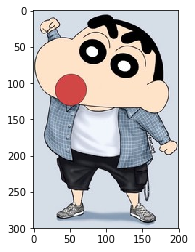

In [2]:
img_path = "../images/xiaoxin.png"
img_torch = transforms.ToTensor()(Image.open(img_path))
print(img_torch.size())

plt.imshow(img_torch.numpy().transpose(1,2,0))
plt.show()

### 缩放、平移

tensor([[[ 1.5000,  0.0000, -1.0000],
         [ 0.0000,  1.5000, -0.4000]]])
torch.Size([1, 4, 300, 200])


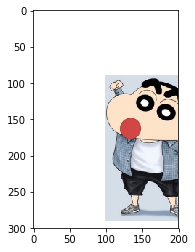

In [3]:
theta = torch.tensor([
    [1.5,0,-1.0],
    [0,1.5,-0.4]
], dtype=torch.float)

print(theta.unsqueeze(0))
print(img_torch.unsqueeze(0).size())

grid = F.affine_grid(theta.unsqueeze(0), img_torch.unsqueeze(0).size())
output = F.grid_sample(img_torch.unsqueeze(0), grid)

plt.imshow(output.squeeze().numpy().transpose(1,2,0))
plt.show()

### 旋转

tensor([[[ 0.7660,  0.6428,  0.0000],
         [-0.6428,  0.7660,  0.0000]]])


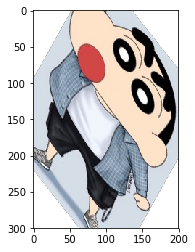

In [4]:
angle = -40*math.pi/180
theta = torch.tensor([
    [math.cos(angle),math.sin(-angle),0],
    [math.sin(angle),math.cos(angle) ,0]
], dtype=torch.float)

print(theta.unsqueeze(0))


grid = F.affine_grid(theta.unsqueeze(0), img_torch.unsqueeze(0).size())
output = F.grid_sample(img_torch.unsqueeze(0), grid)

plt.imshow((output.squeeze().numpy().transpose(1,2,0)*255).astype(np.uint8))
plt.show()